<a href="https://colab.research.google.com/github/shaarminey/Predicting-Churn-for-Bank-Customer-using-Artificial-Neural-Network/blob/main/Predicting_Churn_for_Bank_Customer_using_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [70]:
!pip install mpld3
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [71]:
tf.__version__

'2.6.0'

**Importing and reviewing dataset**

In [72]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


10000

In [74]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [75]:
def num_missing(x):
   return sum(x.isnull())

print ("Missing value per column:")
print (df.apply(num_missing, axis=0))

Missing value per column:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [76]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



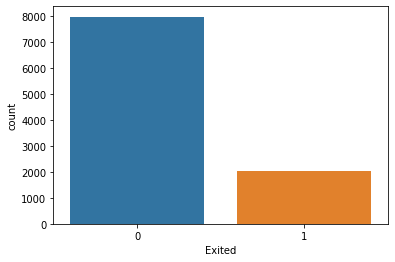

In [77]:
sns.countplot(df['Exited'], label='count')

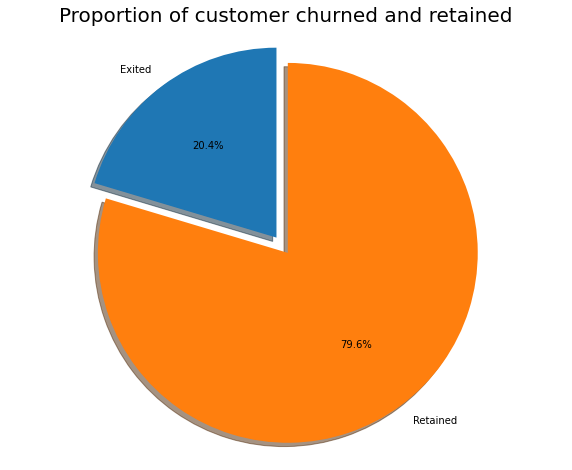

In [78]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

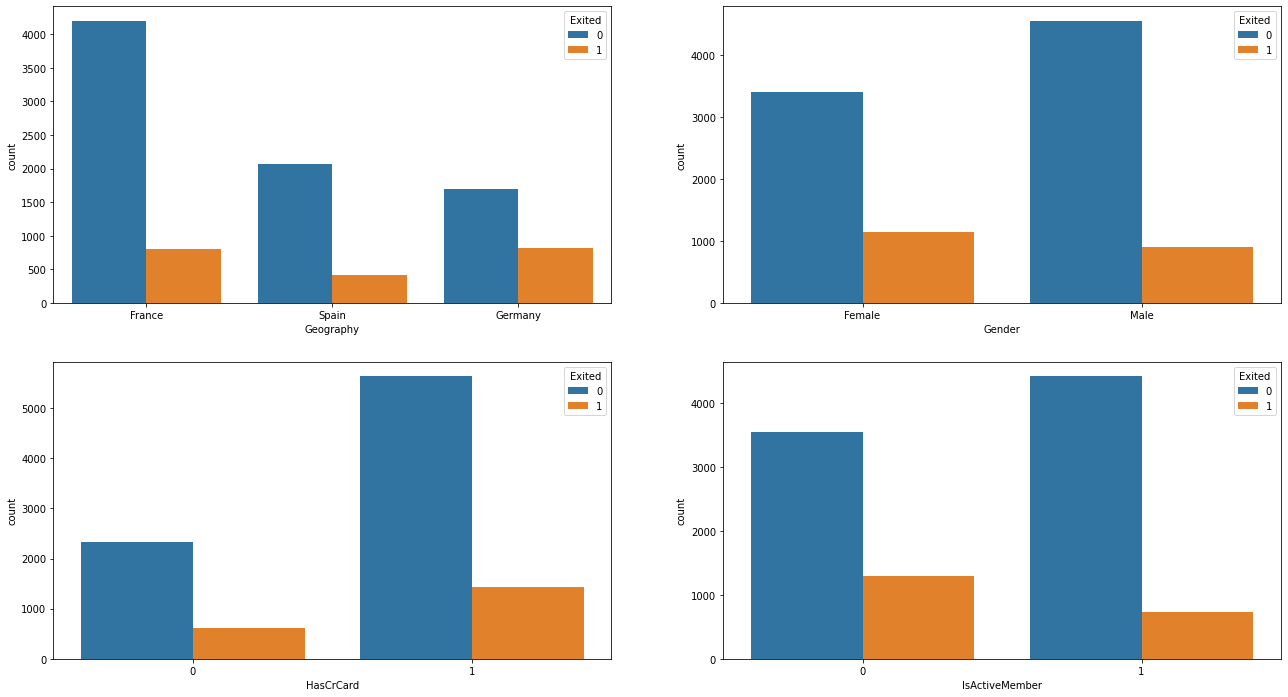

In [79]:
    fig, axarr = plt.subplots(2, 2, figsize=(22, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

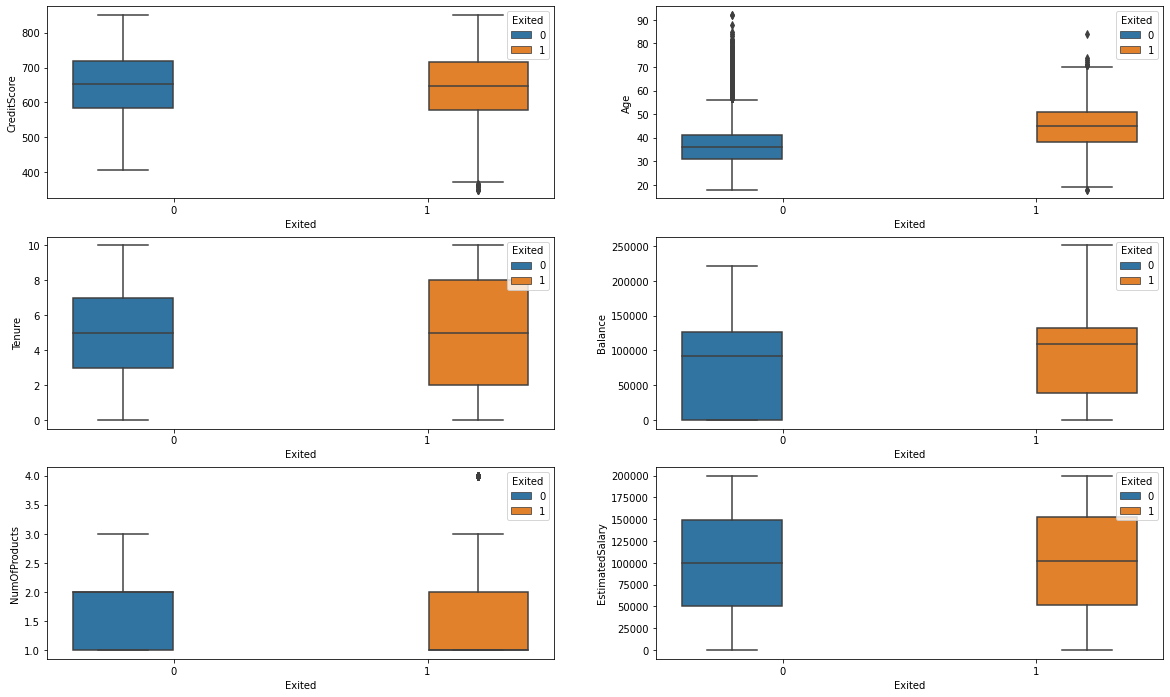

In [80]:
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

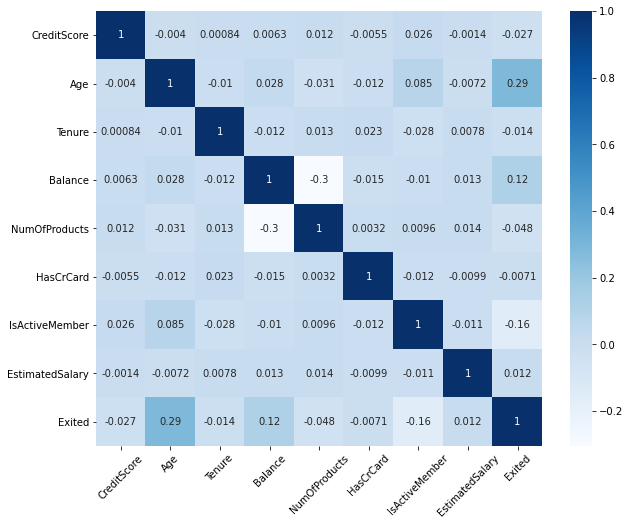

In [81]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr(),
            annot=True,
            annot_kws={'fontsize': 10},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);

# Data Preprocessing for analysis

### Importing the dataset

In [82]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data

Label Encoding the "Gender" column

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

One Hot Encoding the "Geography" column

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Building the ANN**

### Initializing the ANN

In [87]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [88]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [89]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [90]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [91]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [92]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 125)

Epoch 1/125
250/250 [==============================] - 1s 1ms/step - loss: 0.5772 - accuracy: 0.7719
Epoch 2/125
250/250 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7950
Epoch 3/125
250/250 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8045
Epoch 4/125
250/250 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8259
Epoch 5/125
250/250 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8345
Epoch 6/125
250/250 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8406
Epoch 7/125
250/250 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8429
Epoch 8/125
250/250 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8439
Epoch 9/125
250/250 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8451
Epoch 10/125
250/250 [==============================] - 0s 1ms/step - loss: 0.3609 - accura

## Making the predictions and evaluating the model

In [93]:
Y_pred = ann.predict(X_test)

In [94]:
print(Y_pred)

[[0.2016863 ]
 [0.19680113]
 [0.07389769]
 ...
 [0.3364746 ]
 [0.10746735]
 [0.25773734]]


In [95]:
Y_pred = (Y_pred > 0.5)

In [96]:
print(Y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [98]:
confusion_matrix(Y_pred,y_test)

array([[1531,  208],
       [  64,  197]])

In [99]:
accuracy_score(Y_pred,y_test)

0.864

### Predicting the result of a single observation

**Single Observation**

Using ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

In [100]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


### Predicting the Test set results

In [101]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1531   64]
 [ 208  197]]


0.864